##### Copyright 2019 The TensorFlow Authors.
##### 2022-24 P.Huttunen.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#### Print your name

In [2]:
## Your code here 
print("Exercise by: Teemu Gustafsson") 

Exercise by: Teemu Gustafsson


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l06c02_exercise_flowers_with_transfer_learning.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l06c02_exercise_flowers_with_transfer_learning.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# Transfer Learning and model saving

[TensorFlow Hub](http://tensorflow.org/hub) is an online repository of already trained TensorFlow models that you can use.
These models can either be used as is, or they can be used for Transfer Learning.


<div class="alert alert-block alert-info">
⚠️ <b>Note 1.</b> Server <a href="https://tfhub.dev/">tfhub.dev</a> is no longer available. Instead models can be found from <a href="https://www.kaggle.com/models?tfhub-redirect=true">Kaggle</a>, where TensorFlow Hub is now redirected.<br>
</div>


Transfer learning is a process where you take an existing trained model, and extend it to do additional work. This involves leaving the bulk of the model unchanged, while adding and retraining the final layers, in order to get a different set of possible outputs.


<div class="alert alert-block alert-info">
⚠️ <b>Note 2.</b> Keras 3.0 is no longer compatible with Keras 2.x tranfer learning code. See detailed instructions from <a href="https://keras.io/guides/transfer_learning/">Keras 3.0 transfer learning</a>, documentation.<br>
</div>

# Imports


Some normal imports we've seen before. The new one is importing tensorflow_hub which this Colab will make heavy use of.

In [3]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers

import keras
print(keras.__version__)

3.3.3


In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# TODO: Download the Flowers Dataset using TensorFlow Datasets

In the cell below you will download the Flowers dataset using TensorFlow Datasets. If you look at the [TensorFlow Datasets documentation](https://www.tensorflow.org/datasets/catalog/tf_flowers) you will see that the name of the Flowers dataset is `tf_flowers`. You can also see that this dataset is only split into a TRAINING set. You will therefore have to use `tfds.splits` to split this training set into to a `training_set` and a `validation_set`. Do a `[70, 30]` split such that 70 corresponds to the `training_set` and 30 to the `validation_set`. Then load the `tf_flowers` dataset using `tfds.load`. Make sure the `tfds.load` function uses the all the parameters you need, and also make sure it returns the dataset info, so we can retrieve information about the datasets.

```python
# Use Tensorflow dataset
splits = 
(training_set, validation_set), dataset_info =

print(dataset_info)
```


In [6]:
## Task 1:
## Your code here 

splits = ['train[:70%]', 'train[70%:]']

(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers', 
    with_info=True, 
    as_supervised=True, 
    split=splits,
)

print(dataset_info)

num_examples = dataset_info.splits['train'].num_examples

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/home/jovyan/tensorflow_datasets/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


# TODO: Print Information about the Flowers Dataset

Now that you have downloaded the dataset, use the dataset info to print the number of classes in the dataset, and also write some code that counts how many images we have in the training and validation sets. 

```python
# Print number of classes, training dataset and validation dataset 
num_classes = 
num_training_examples = 
num_validation_examples = 
```

In [7]:
## Task 2:
## Your code here 
num_classes = dataset_info.features['label'].num_classes

num_training_examples = sum(1 for _ in training_set)
num_validation_examples = sum(1 for _ in validation_set)

print(f"Number of classes: {num_classes}")
print(f"Number of examples: {num_examples}")
print(f"Number of training examples: {num_training_examples}")
print(f"Number of validation examples: {num_validation_examples}")


Number of classes: 5
Number of examples: 3670
Number of training examples: 2569
Number of validation examples: 1101


The images in the Flowers dataset are not all the same size.

In [8]:
for i, example in enumerate(training_set.take(5)):
  print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (333, 500, 3) label: 2
Image 2 shape: (212, 320, 3) label: 3
Image 3 shape: (240, 320, 3) label: 3
Image 4 shape: (240, 320, 3) label: 4
Image 5 shape: (317, 500, 3) label: 3


# TODO: Reformat Images and Create Batches

In the cell below create a function that reformats all images to the resolution expected by MobileNet v2 (224, 224) and normalizes them. The function should take in an `image` and a `label` as arguments and should return the new `image` and corresponding `label`. Then create training and validation batches of size `32`.

```python
# Reformat Images and Create Batches
IMAGE_RES = 

def format_image(image, label):
  
  return image, label

BATCH_SIZE = 
train_batches = 
validation_batches = 
```

In [9]:
## Task 3:
## Your code here 

IMAGE_RES = 224

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches = (
    training_set
    .shuffle(num_examples)  
    .map(format_image)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

validation_batches = (
    validation_set
    .map(format_image)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

In [10]:
num_examples

3670

# Simple Transfer Learning exercise

Let's now use TensorFlow mobilenet_v2 to do Transfer Learning. Remember, in transfer learning we reuse parts of an already trained model and change the final layer, or several layers, of the model, and then retrain those layers on our own dataset.

### TODO: Create a Base model
In the cell below create a `base_model` using MobileNet v2. Remember that the partial model (without the final classification layer) is called a feature vector. Go to the [Keras documentation](https://keras.io/api/applications/) to see a list of available models. 

```python 
# Create a Feature Extractor
URL = 
feature_extractor = 
```

In [11]:
## Task 4:
## Your code here 

base_model = keras.applications.MobileNetV2(
    input_shape=(IMAGE_RES, IMAGE_RES, 3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=max,
    #classes=1000,
    #classifier_activation="softmax",
)

### TODO: Freeze Base Model parameters

In the cell below freeze the variables in the base model, so that the training only modifies the final classifier layer.

```python
# Freeze the base_model
base_model
```

In [12]:
## Task 5:
## Your code here 
base_model.trainable = False
 

### TODO: Build final model on top of the base model

In the cell below create a `keras.Model` model based on base model and the new classification layer. Remember that the classification layer must have the same number of classes as our Flowers dataset. You can also add dropout layer before classification layer. Finally print a summary of the model.

```python
# Create model with feature extractor and classifier layer
model = 

# Print model summary

```

In [13]:
## Task 6:
## Your code here 
inputs = keras.Input(shape=(IMAGE_RES, IMAGE_RES, 3))
x = base_model(inputs)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.2)(x) 
outputs = keras.layers.Dense(num_classes, activation='softmax')(x) 

model = keras.Model(inputs, outputs)

model.summary(show_trainable=True)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ mobilenetv2_1.00_224        │ (None, 7, 7, 1280)    │  2,257,984 │   N   │
│ (Functional)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 62720)         │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout (Dropout)           │ (None, 62720)         │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 5)             │    313,605 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 2,571,589 (9.81 MB)

 Trainable params: 313,605 (1.20 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

### TODO: Train the model

In the cell bellow train this model like any other, by first calling `compile` and then followed by `fit`. Make sure you use the proper parameters when applying both methods. Train the model for only 6 epochs.

```python
# Compile model and train it with fit function

EPOCHS = 
history = 
```

In [14]:
## Task 7:
## Your code here 
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
)

EPOCHS = 6
with tf.device('GPU:0'):
    history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/6


I0000 00:00:1725092670.675195    2206 service.cc:145] XLA service 0x7fe5a0003510 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725092670.675376    2206 service.cc:153]   StreamExecutor device (0): Tesla V100-PCIE-12GB, Compute Capability 7.0


12/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4229 - loss: 4.3435

I0000 00:00:1725092675.831246    2206 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.6493 - loss: 3.4174 - val_accuracy: 0.8029 - val_loss: 2.1261
Epoch 2/6
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9301 - loss: 0.5593 - val_accuracy: 0.8411 - val_loss: 1.9323
Epoch 3/6
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9697 - loss: 0.1743 - val_accuracy: 0.8556 - val_loss: 2.0223
Epoch 4/6
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9785 - loss: 0.1137 - val_accuracy: 0.8601 - val_loss: 1.7237
Epoch 5/6
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9933 - loss: 0.0264 - val_accuracy: 0.8792 - val_loss: 1.6885
Epoch 6/6
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9950 - loss: 0.0347 - val_accuracy: 0.8783 - val_loss: 1.6338


You can see we get ~88% validation accuracy with only 6 epochs of training, which is absolutely awesome. This is a huge improvement over the model we created in the previous lesson, where we were able to get ~76% accuracy with 80 epochs of training. The reason for this difference is that MobileNet v2 was carefully designed over a long time by experts, then trained on a massive dataset (ImageNet).

# TODO: Plot Training and Validation Graphs

In the cell below, plot the training and validation accuracy/loss graphs.

```python
# Plot Training and Validation Graphs
acc = 
val_acc = 

loss = 
val_loss = 

epochs_range = 
```

In [15]:
## Task 8:
## Your code here 



What is a bit curious here is that validation performance is better than training performance, right from the start to the end of execution.

One reason for this is that validation performance is measured at the end of the epoch, but training performance is the average values across the epoch.

The bigger reason though is that we're reusing a large part of MobileNet which is already trained on Flower images. 

# TODO: Check Predictions

In the cell below get the label names from the dataset info and convert them into a NumPy array. Print the array to make sure you have the correct label names.

In [16]:
## Task 9:
## Your code here 

 

### TODO: Create an Image Batch and Make Predictions

In the cell below, use the `next()` function to create an `image_batch` and its corresponding `label_batch`. Convert both the `image_batch` and `label_batch` to numpy arrays using the `.numpy()` method. Then use the `.predict()` method to run the image batch through your model and make predictions. Then use the `np.argmax()` function to get the indices of the best prediction for each image. Finally convert the indices of the best predictions to class names.

```python
# Create an Image Batch and Make Predictions

image_batch, label_batch = 

predicted_class_names =
uncorrect_predictions =

```

In [17]:
## Task 10:
## Your code here 

 

### TODO: Print True Labels and Predicted Indices

In the cell below, print the true labels and the indices of predicted labels.

```python
# Print True Labels and Predicted Indices
print()

print(uncorrect_predictions_classes)
#Hint. https://www.geeksforgeeks.org/counters-in-python-set-1/

```

In [18]:
## Task 11:
## Your code here 

 

# Plot Model Predictions

NameError: name 'image_batch' is not defined

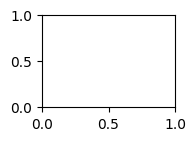

In [19]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

# Save model

Currently most common formats for model saving are:
- .keras format (Keras file format)
- Saved Model format (Tensorflow file format)

### TODO: Save model in .keras format

```python
    # Save model in .keras format (Add your name to filename!)
    save_path_keras = "flowers_saved_NN.keras"
    
    # Your code here
```

In [ ]:
## Task 12:
## Your code here 

 

### TODO: Export model in Tensorflow Saved Model format

**Note.** You will need this saved model later in this course 

```python
    # Save model in Saved Model format (Add your name to folder name!)
    export_path_sm = "./flowers_SavedModel_NN"
    
    # Your code here
```

In [ ]:
## Task 13:
## Your code here 

 

# Load model
### TODO: Load saved .keras model 

```python
    # Load Saved Model
    reloaded_model = 
```

In [ ]:
## Task 14:
## Your code here 

 

### TODO: Train reloaded model for 1 epoch.


```python
# Train reloaded model 1 epoch
```

In [ ]:
## Task 15:
## Your code here 

 

### TODO: Run inference with reloaded and re-trained model. What is model's accuracy?
Calculate validation dataset accuracy with re-trained model.

```python
# Run inference with reloaded and re-trained model. What is model's accuracy?
```

In [ ]:
## Task 16:
## Your code here 

 

# OPTIONAL: Perform Transfer Learning with the Inception Model

Go to the [TensorFlow Hub documentation](https://tfhub.dev/s?module-type=image-feature-vector&q=tf2) and click on `tf2-preview/inception_v3/feature_vector`. This feature vector corresponds to the Inception v3 model. In the cells below, use transfer learning to create a CNN that uses Inception v3 as the pretrained model to classify the images from the Flowers dataset. Note that Inception, takes as input, images that are 299 x 299 pixels. Compare the accuracy you get with Inception v3 to the accuracy you got with MobileNet v2.